In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"Customertravel.csv")

In [3]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [5]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [6]:
df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [7]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

No null data in any columns

# DATA PREPROCESSING

In [8]:
df["FrequentFlyer"].unique()

array(['No', 'Yes', 'No Record'], dtype=object)

In [9]:
df["AnnualIncomeClass"].unique()

array(['Middle Income', 'Low Income', 'High Income'], dtype=object)

In [10]:
df["AccountSyncedToSocialMedia"].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df["BookedHotelOrNot"].unique()

array(['Yes', 'No'], dtype=object)

change categorical data to numerical data

In [12]:
ff_mapping = {'No': 0, 'Yes': 1, 'No Record': 2}
income_mapping = {'Low Income': 0, 'Middle Income': 1, 'High Income': 2}
sns_mapping = {'No': 0, 'Yes': 1}
hotel_mapping = {'No': 0, 'Yes': 1}

df['FrequentFlyer'] = df['FrequentFlyer'].map(ff_mapping)
df['AnnualIncomeClass'] = df['AnnualIncomeClass'].map(income_mapping)
df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].map(sns_mapping)
df['BookedHotelOrNot'] = df['BookedHotelOrNot'].map(hotel_mapping)


In [13]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,1,6,0,1,0
1,34,1,0,5,1,0,1
2,37,0,1,3,1,0,0
3,30,0,1,2,0,0,0
4,30,0,0,1,0,0,0


In [14]:
df.describe()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,32.109015,0.425577,0.762055,2.437107,0.377358,0.396226,0.234801
std,3.337388,0.608799,0.717775,1.606233,0.484980,0.489369,0.424097
min,27.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000
max,38.000000,2.000000,2.000000,6.000000,1.000000,1.000000,1.000000


In [15]:
df.corr()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
Age,1.000000,-0.007881,-0.016319,-0.012422,-0.016367,0.024281,-0.131534
FrequentFlyer,-0.007881,1.000000,0.203163,-0.099221,-0.039831,-0.129851,0.275024
AnnualIncomeClass,-0.016319,0.203163,1.000000,0.090307,-0.227101,-0.024068,0.142365
ServicesOpted,-0.012422,-0.099221,0.090307,1.000000,-0.148655,0.155886,0.038646
AccountSyncedToSocialMedia,-0.016367,-0.039831,-0.227101,-0.148655,1.000000,-0.100104,0.073831
BookedHotelOrNot,0.024281,-0.129851,-0.024068,0.155886,-0.100104,1.000000,-0.206055
Target,-0.131534,0.275024,0.142365,0.038646,0.073831,-0.206055,1.000000


## DATA VISUALISATION

In [16]:
df["BookedHotelOrNot"].value_counts()

BookedHotelOrNot
0    576
1    378
Name: count, dtype: int64

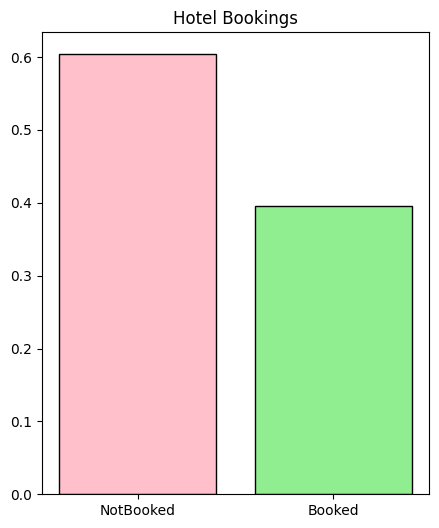

In [17]:
plt.figure(figsize=(5,6))
plt.bar(["NotBooked","Booked"], df['BookedHotelOrNot'].value_counts(normalize = 1), edgecolor = 'black', width = 0.8, color = ['pink', 'lightgreen'])
plt.title('Hotel Bookings')
plt.show()

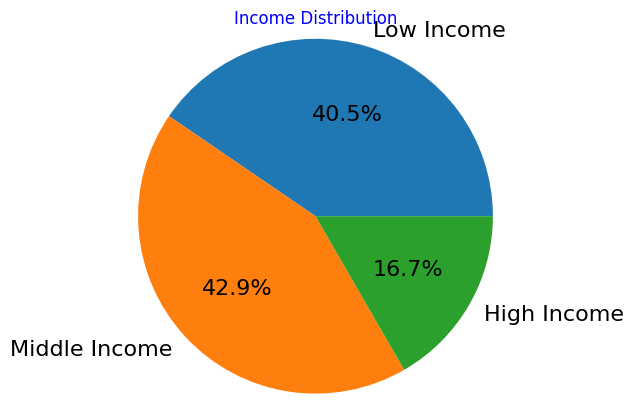

In [18]:
income = df.groupby("AnnualIncomeClass")
income = income.size()
plt.pie(income.values , labels = ("Low Income", "Middle Income","High Income"), autopct='%1.1f%%', radius = 1.2, textprops = {"fontsize" : 16}) 
plt.title("Income Distribution", c="b")
plt.show()

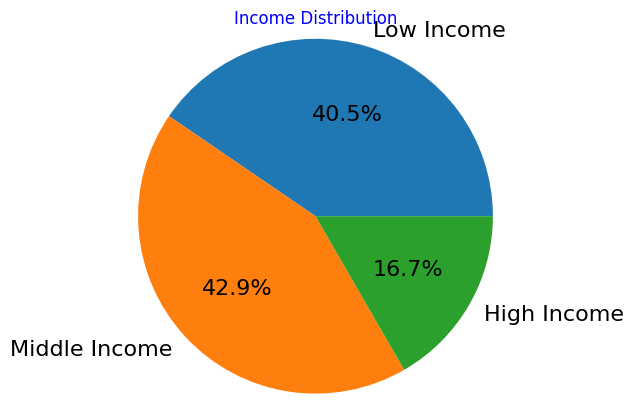

In [19]:
plt.pie(income.values , labels = ("Low Income", "Middle Income","High Income"), autopct='%1.1f%%', radius = 1.2, textprops = {"fontsize" : 16}) 
plt.title("Income Distribution", c="b")
plt.show()

Target
0    730
1    224
Name: count, dtype: int64


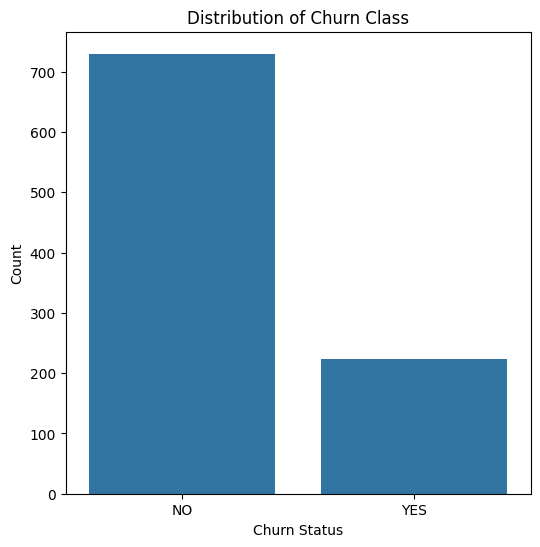

In [20]:
class_counts = df["Target"].value_counts()
print(class_counts)
plt.figure(figsize=(6, 6))
sns.barplot(x=["NO", "YES"], y=class_counts.values)
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Distribution of Churn Class')
plt.show()

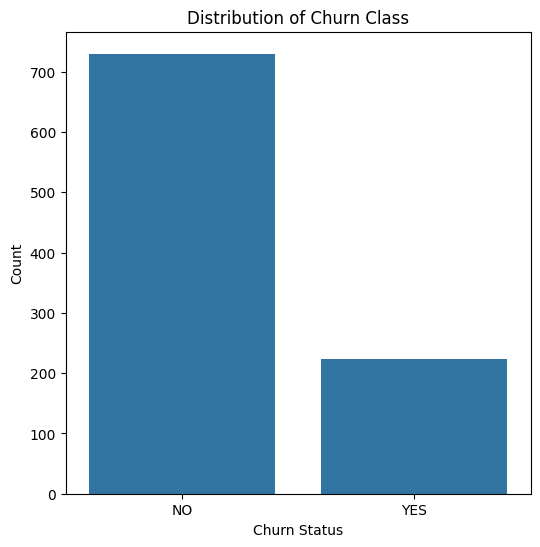

In [21]:
plt.figure(figsize=(6, 6))
sns.barplot(x=["NO", "YES"], y=class_counts.values)
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Distribution of Churn Class')
plt.show()

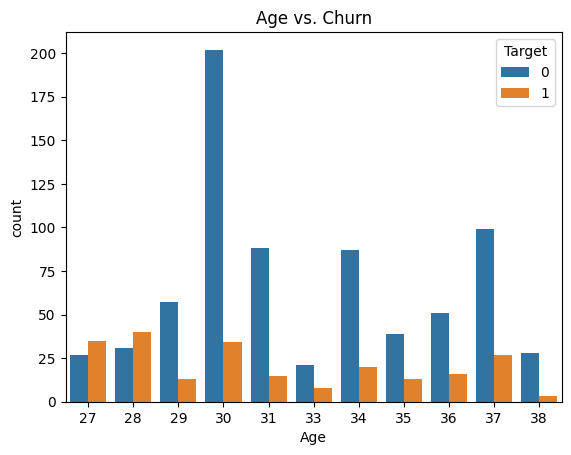

In [22]:

sns.countplot(x='Age', hue='Target', data=df)
plt.title('Age vs. Churn')
plt.show()


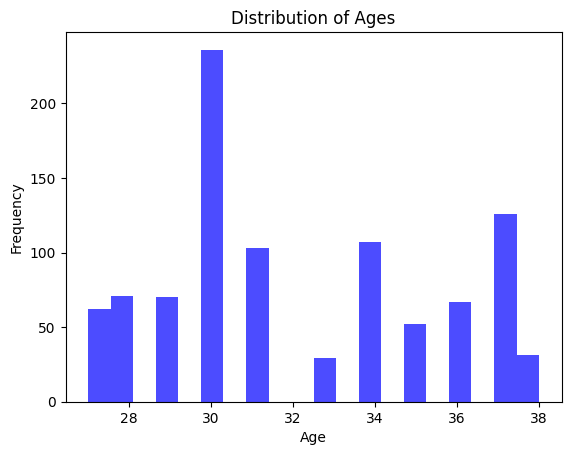

In [23]:
plt.hist(df["Age"], bins=20, color='blue', alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Ages")

# Show the plot
plt.show()

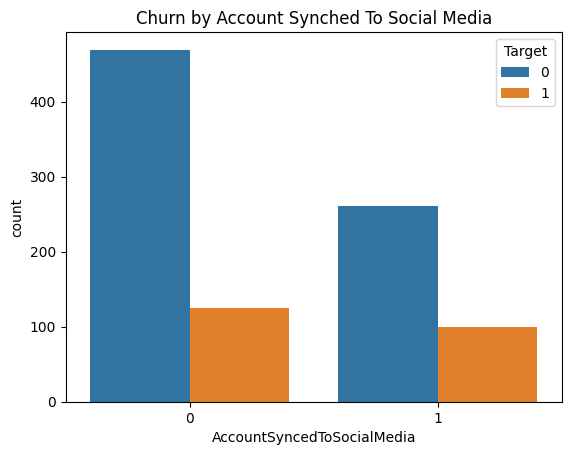

In [24]:
sns.countplot(data=df, x='AccountSyncedToSocialMedia', hue='Target').set_title('Churn by Account Synched To Social Media');

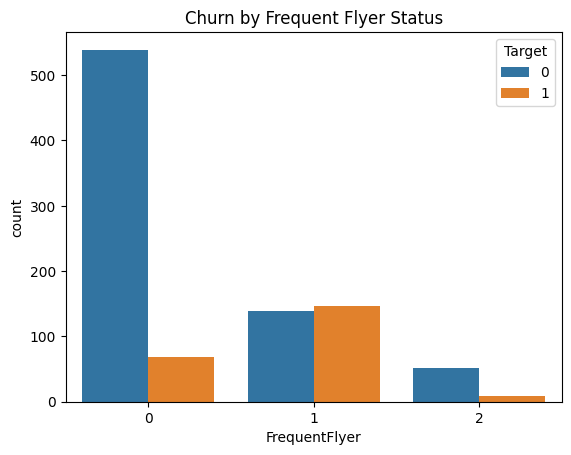

In [25]:
sns.countplot(data=df, x='FrequentFlyer', hue='Target').set_title('Churn by Frequent Flyer Status');

Text(0.5, 1.0, 'Churn by Age')

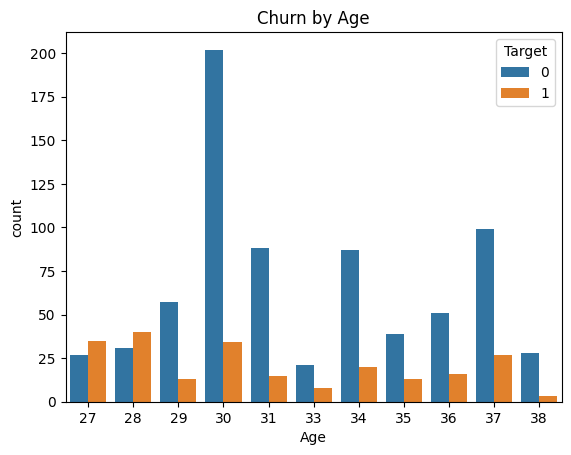

In [26]:
sns.countplot(data=df, x='Age', hue='Target').set_title('Churn by Age')

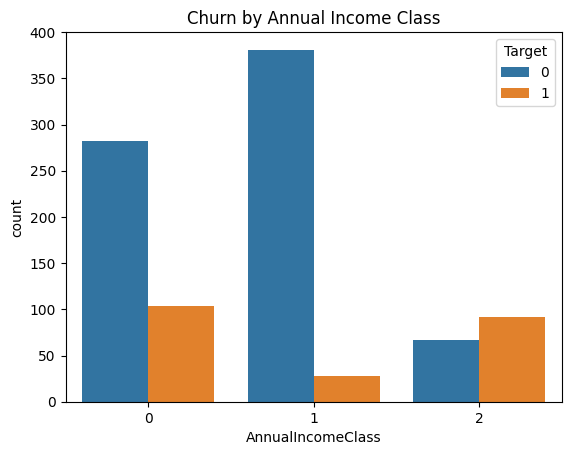

In [27]:
sns.countplot(data=df, x='AnnualIncomeClass', order=[0,1,2], hue='Target').set_title('Churn by Annual Income Class');

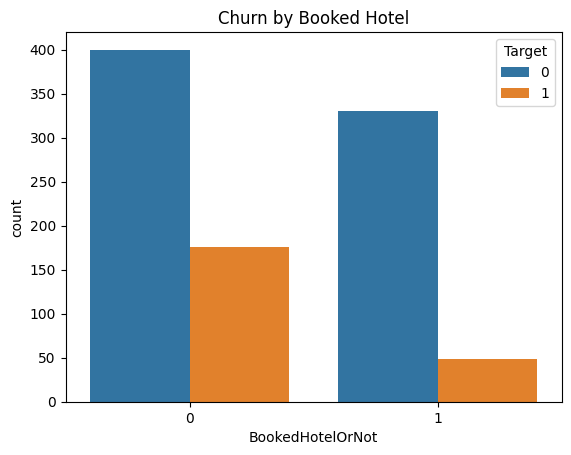

In [28]:
sns.countplot(data=df, x='BookedHotelOrNot', hue='Target').set_title('Churn by Booked Hotel'); 

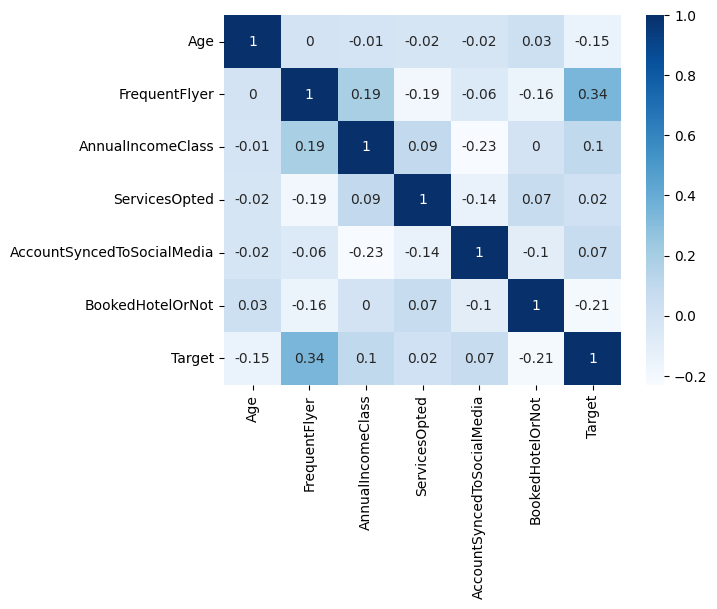

In [29]:
sns.heatmap(np.round(df.corr(method ='spearman'), 2), annot=True,  cmap='Blues');

# CUSTOMER SEGEMENTATION

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'ServicesOpted']] = scaler.fit_transform(df[['Age', 'ServicesOpted']])

In [31]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,0.566904,0,1,2.219330,0,1,0
1,0.566904,1,0,1.596429,1,0,1
2,1.466282,0,1,0.350627,1,0,0
3,-0.632267,0,1,-0.272274,0,0,0
4,-0.632267,0,0,-0.895175,0,0,0


In [32]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


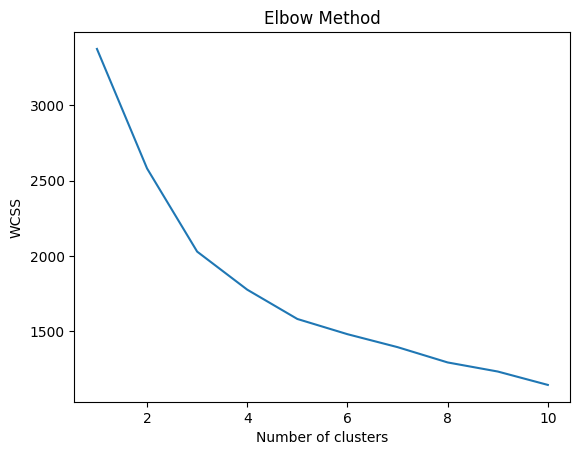

In [33]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [74]:
optimal_clusters =5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

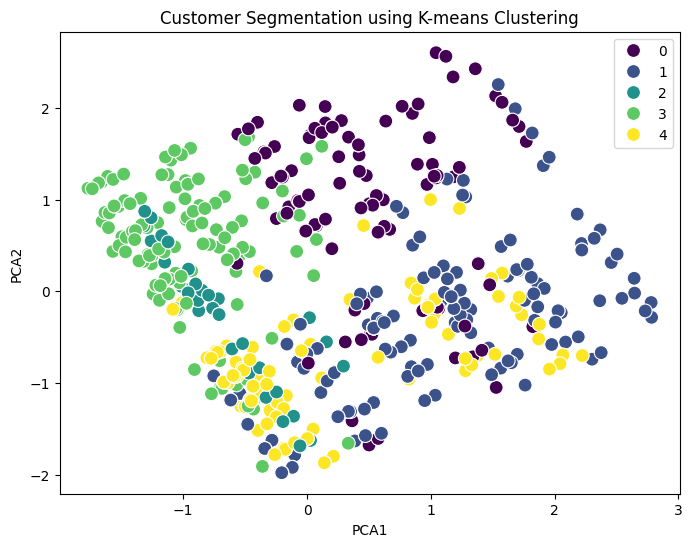

In [75]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('Cluster', axis=1))

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# CHURN PREDICTION

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
df_cluster=df.copy()
df.drop(columns="Cluster",axis=1,inplace=True)

In [38]:
y=df['Target']
x=df.drop(columns='Target', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [39]:
y_train.head()

366    0
592    0
810    0
340    0
291    0
Name: Target, dtype: int64

In [40]:
x_train.shape

(667, 6)

In [41]:
x_test.shape

(287, 6)

In [42]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier 

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, classification_report

In [43]:
def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')

Logistic regression 

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       234
           1       0.33      0.17      0.23        53

    accuracy                           0.78       287
   macro avg       0.58      0.55      0.55       287
weighted avg       0.74      0.78      0.75       287


Confusion Matrix: 



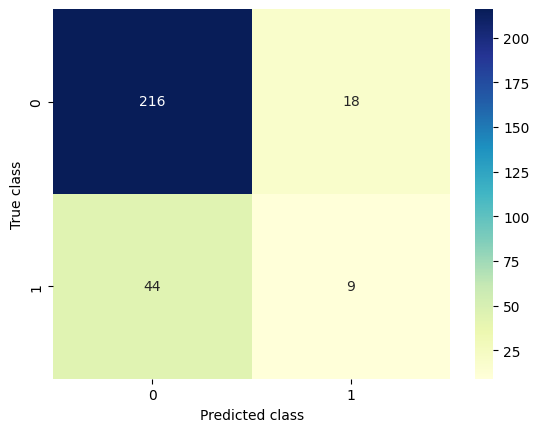

In [44]:
logr= LogisticRegression()
print('Logistic regression \n')
fit_evaluate(logr, x_train, x_test, y_train, y_test)

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       234
           1       0.61      0.68      0.64        53

    accuracy                           0.86       287
   macro avg       0.77      0.79      0.78       287
weighted avg       0.87      0.86      0.86       287


Confusion Matrix: 



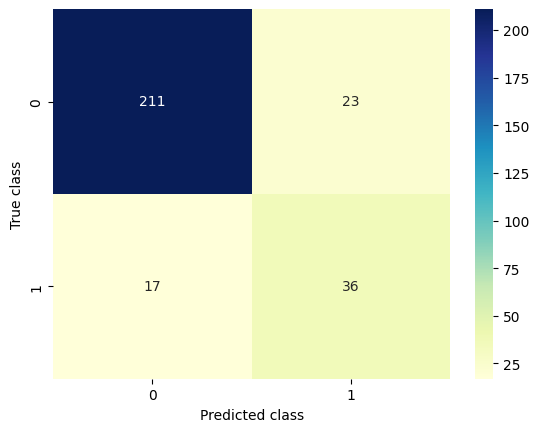

In [45]:
rfc= RandomForestClassifier()
print('Random Forest Classifier \n')
fit_evaluate(rfc,x_train,x_test, y_train, y_test)

Balanced Random Forest Classifier 



C:\Users\Anoushka Kalouni\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Anoushka Kalouni\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Anoushka Kalouni\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future 

              precision    recall  f1-score   support

           0       0.97      0.85      0.90       234
           1       0.57      0.87      0.69        53

    accuracy                           0.85       287
   macro avg       0.77      0.86      0.80       287
weighted avg       0.89      0.85      0.86       287


Confusion Matrix: 



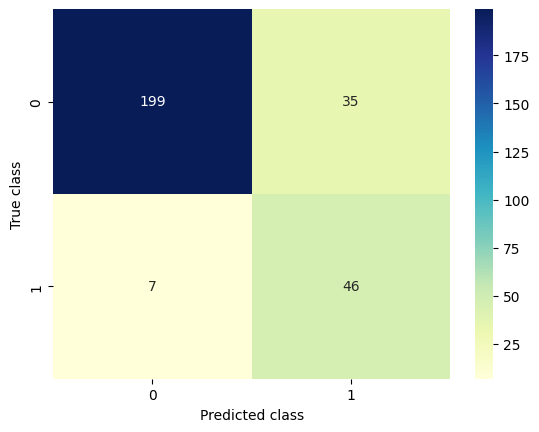

In [46]:
brfc=BalancedRandomForestClassifier()
print('Balanced Random Forest Classifier \n')
fit_evaluate(brfc,x_train,x_test, y_train, y_test)

Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       234
           1       0.68      0.74      0.71        53

    accuracy                           0.89       287
   macro avg       0.81      0.83      0.82       287
weighted avg       0.89      0.89      0.89       287


Confusion Matrix: 



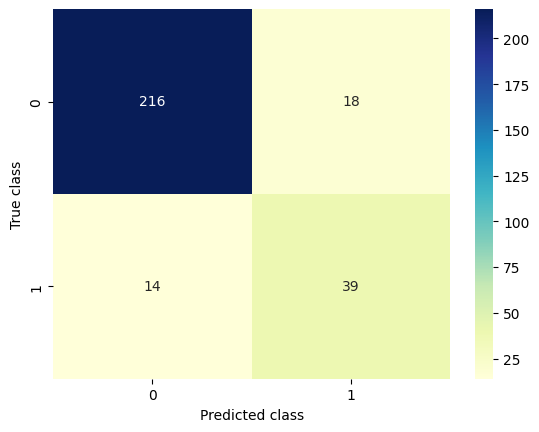

In [47]:
gbc=GradientBoostingClassifier()
print('Gradient Boosting Classifier\n')
fit_evaluate(gbc,x_train,x_test, y_train, y_test)

Minimum error: 0.101 at K = 2 



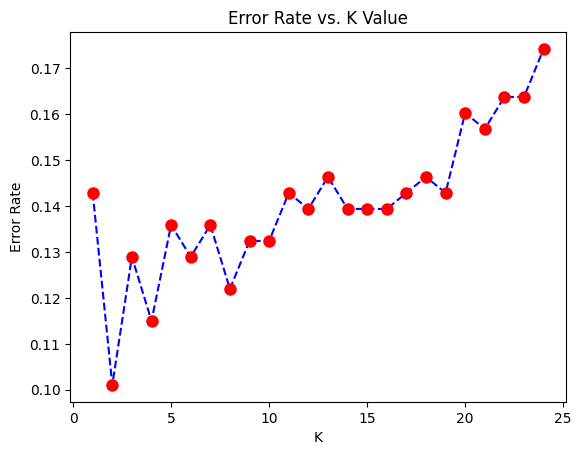

In [48]:
#Find best K
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,25), error_rate, color='b', linestyle='--', marker='o', markerfacecolor='r', markeredgecolor='r', markersize=8)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K Value')

# plotting the k value that minimizes the error 
print('Minimum error:', np.round(min(error_rate), 3),'at K =', (error_rate.index(min(error_rate)) + 1), '\n');

K Nearest Neighbors Classifier 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       234
           1       0.90      0.51      0.65        53

    accuracy                           0.90       287
   macro avg       0.90      0.75      0.80       287
weighted avg       0.90      0.90      0.89       287


Confusion Matrix: 



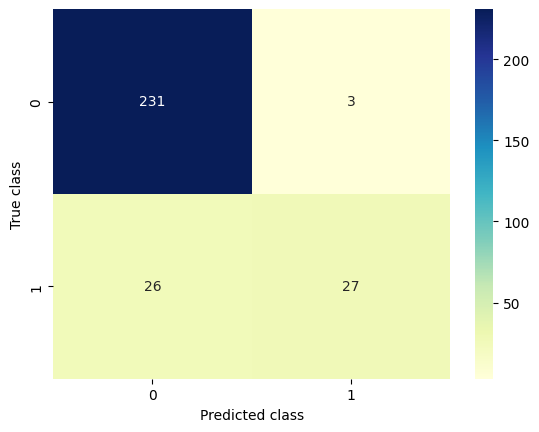

In [49]:
knn=KNeighborsClassifier(n_neighbors=2) 
print('K Nearest Neighbors Classifier \n')
fit_evaluate(knn,x_train,x_test, y_train, y_test)

Best result comapred to all the prediction models is observed in KNN (n=2)

In [50]:
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [51]:
df['Churn_Probability'] = knn.predict_proba(x)[:, 1]

In [52]:
churn_customers = df[df['Churn_Probability'] > 0.5]
churn_customers

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,Churn_Probability
1,0.566904,1,0,1.596429,1,0,1,1.0
5,-1.531645,1,2,-0.895175,0,1,1,1.0
7,0.566904,0,0,-0.272274,1,0,1,1.0
11,-1.231853,0,1,-0.272274,0,0,1,1.0
19,1.466282,0,0,-0.272274,1,0,1,1.0
...,...,...,...,...,...,...,...,...
919,-1.231853,0,0,-0.272274,1,0,1,1.0
929,-1.231853,1,2,-0.895175,0,0,1,1.0
937,-0.632267,1,0,1.596429,1,0,1,1.0
945,-0.632267,1,2,2.219330,0,1,1,1.0


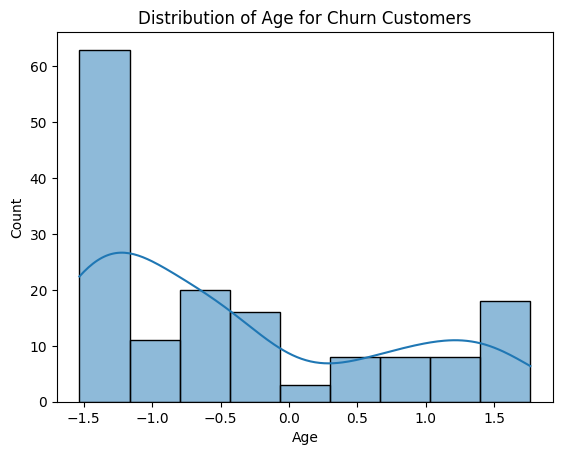

In [53]:
sns.histplot(churn_customers['Age'], kde=True)
plt.title('Distribution of Age for Churn Customers')
plt.show()

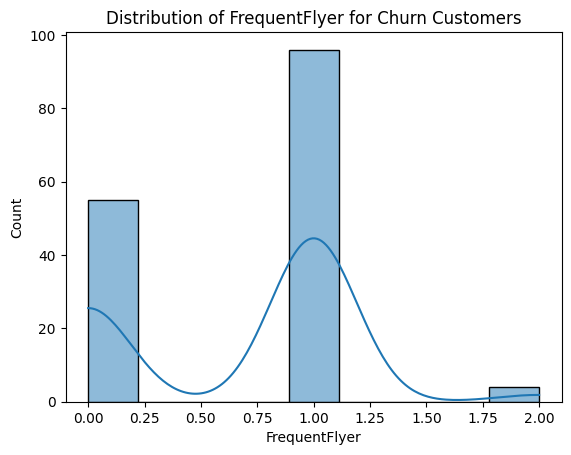

In [54]:
sns.histplot(churn_customers['FrequentFlyer'], kde=True)
plt.title('Distribution of FrequentFlyer for Churn Customers')
plt.show()

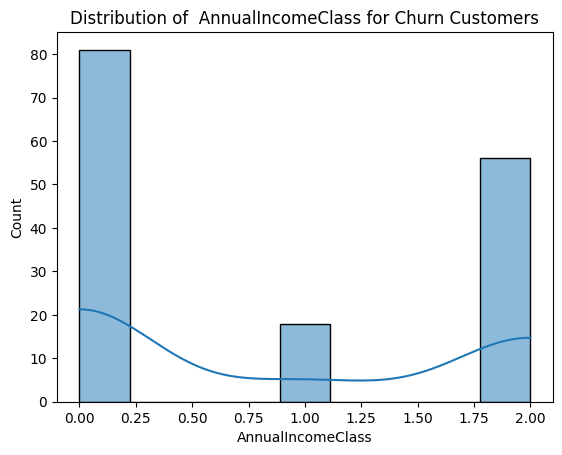

In [55]:

sns.histplot(churn_customers['AnnualIncomeClass'], kde=True)
plt.title('Distribution of  AnnualIncomeClass for Churn Customers')
plt.show()

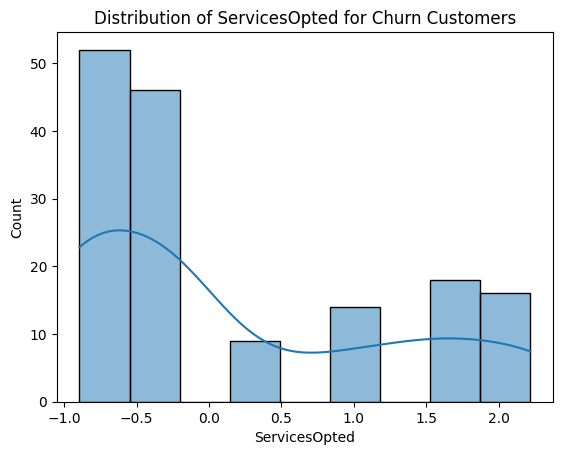

In [56]:

sns.histplot(churn_customers['ServicesOpted'], kde=True)
plt.title('Distribution of ServicesOpted for Churn Customers')
plt.show()

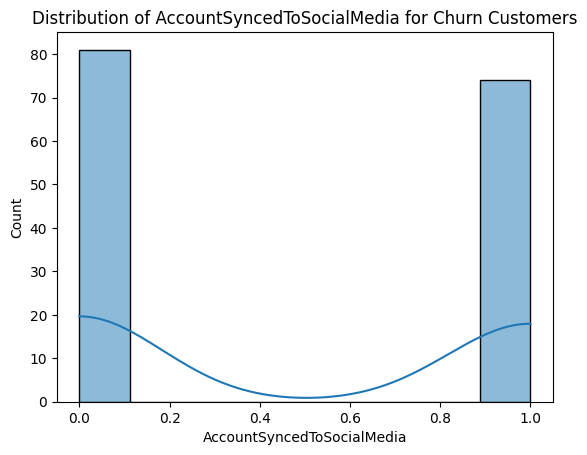

In [57]:

sns.histplot(churn_customers['AccountSyncedToSocialMedia'], kde=True)
plt.title('Distribution of AccountSyncedToSocialMedia for Churn Customers')
plt.show()

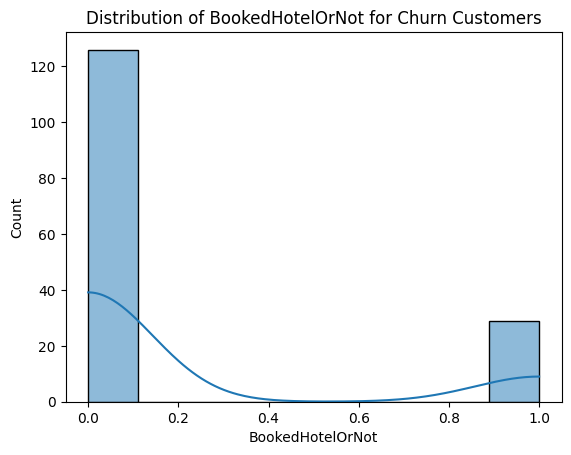

In [58]:

sns.histplot(churn_customers['BookedHotelOrNot'], kde=True)
plt.title('Distribution of BookedHotelOrNot for Churn Customers')
plt.show()

In [59]:
df_new=df.copy()

In [62]:
df_new.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,Churn_Probability,Cluster
0,0.566904,0,1,2.219330,0,1,0,0.0,2
1,0.566904,1,0,1.596429,1,0,1,1.0,2
2,1.466282,0,1,0.350627,1,0,0,0.0,2
3,-0.632267,0,1,-0.272274,0,0,0,0.0,4
4,-0.632267,0,0,-0.895175,0,0,0,0.0,4


In [76]:
df_new["Cluster"]=df_cluster["Cluster"]

In [77]:
clusters=df_new.groupby("Cluster")
clusters=clusters["Churn_Probability"].mean()
clusters

Cluster
0    0.146635
1    0.230570
2    0.178571
3    0.443182
4    0.222846
Name: Churn_Probability, dtype: float64

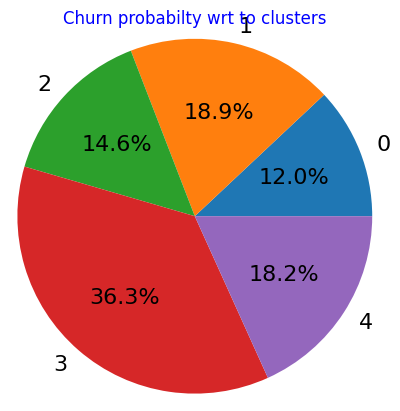

In [78]:
plt.pie(clusters.values , labels = (0,1,2,3,4), autopct='%1.1f%%', radius = 1.2, textprops = {"fontsize" : 16}) 
plt.title("Churn probabilty wrt clusters", c="b")
plt.show()

Customers in cluster 0 are least likely to churn 
and customers in cluster 3 are most likely to churn